In [139]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import pandas as pd
import random
from fuzzywuzzy import fuzz
import string
import re
import pickle

In [140]:
#Loading the dataset
path1= 'afmusic_df.csv'
afmusic_df = pd.read_csv(path1)
afmusic_df
path2= 'music_compl_df.csv'
music_com_df = pd.read_csv(path2)
music_com_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.682,0.51400,5,-11.511,0,0.0344,0.00293,0.466000,0.0314,0.8710,126.992,3eW0EErw6RJrEr0CkgHKDi,209000,4
1,0.723,0.96900,6,-4.516,1,0.1420,0.06430,0.000000,0.1150,0.7280,126.653,54OR1VDpfkBuOY5zZjhZAY,286800,4
2,0.885,0.66400,1,-11.795,1,0.0524,0.14500,0.048300,0.0767,0.9060,121.632,3K7Q9PHUWPTaknlbFPThn2,298867,4
3,0.878,0.82100,11,-9.875,1,0.0890,0.12600,0.046100,0.1830,0.9470,118.881,46eu3SBuFCXWsPT39Yg3tJ,365467,4
4,0.729,0.93600,9,-7.536,1,0.0776,0.01290,0.000892,0.0367,0.5980,131.986,06hsdMbBxWGqBO0TV0Zrkf,194000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,0.273,0.00516,4,-27.926,0,0.0397,0.99400,0.900000,0.0955,0.1360,91.405,73cFlYu63RLX1qn9qzMXiJ,176187,4
2354,0.130,0.08600,10,-21.920,1,0.0373,0.93200,0.912000,0.1080,0.0375,90.223,3Sy6wgTNEp6vSgLs4EyXAf,391160,4
2355,0.176,0.00600,5,-42.238,1,0.0384,0.89900,0.000032,0.1050,0.0383,71.477,4wudbbceOZKjRlhTtbHvAs,636000,3
2356,0.487,0.01880,0,-25.825,1,0.0513,0.99500,0.891000,0.1070,0.1900,73.663,5qXxnObo7mB0tILE3gObhJ,104683,5


In [141]:
X = pd.DataFrame(afmusic_df)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
#display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.621101,0.051483,-0.044446,-0.001508,-1.265958,-0.430443,-1.269291,0.585677,-0.962875,1.276595,0.393629,-0.360691,0.259131
1,0.856588,1.826268,0.239574,1.124847,0.789916,1.439993,-1.089896,-0.683251,-0.326931,0.744415,0.381896,0.492343,0.259131
2,1.787051,0.636577,-1.180524,-0.047238,0.789916,-0.117545,-0.853995,-0.551729,-0.618279,1.406848,0.208106,0.624651,0.259131
3,1.746846,1.248975,1.659671,0.261926,0.789916,0.518682,-0.909535,-0.557719,0.190343,1.559431,0.112886,1.354883,0.259131
4,0.891050,1.697547,1.091632,0.638558,0.789916,0.320513,-1.240147,-0.680822,-0.922558,0.260616,0.566485,-0.525157,0.259131


In [142]:
X_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2.358000e+03,2.358000e+03,2.358000e+03,2.358000e+03,2.358000e+03,2.358000e+03,2.358000e+03,2358.000000,2.358000e+03,2.358000e+03,2.358000e+03,2.358000e+03,2.358000e+03
mean,1.446397e-16,-1.205331e-17,-1.235464e-16,2.410662e-17,1.807997e-16,4.821325e-17,1.687464e-16,0.000000,1.506664e-17,8.437318e-17,-3.555727e-16,5.423990e-17,-9.039984e-17
std,1.000212e+00,1.000212e+00,1.000212e+00,1.000212e+00,1.000212e+00,1.000212e+00,1.000212e+00,1.000212,1.000212e+00,1.000212e+00,1.000212e+00,1.000212e+00,1.000212e+00
min,-2.917529e+00,-1.950681e+00,-1.464543e+00,-5.244090e+00,-1.265958e+00,-6.338269e-01,-1.277832e+00,-0.683251,-1.021449e+00,-1.964861e+00,-2.717285e+00,-2.252573e+00,-7.015044e+00
25%,-6.482338e-01,-7.364432e-01,-8.965043e-01,-3.148986e-01,-1.265958e+00,-4.491300e-01,-9.962807e-01,-0.683206,-5.070266e-01,-8.111858e-01,-8.188081e-01,-6.629395e-01,2.591309e-01
50%,1.041773e-01,-1.872817e-02,-4.444580e-02,2.264200e-01,7.899158e-01,-3.104987e-01,-1.144294e-01,-0.669077,-3.497523e-01,7.551652e-03,-4.004970e-02,-1.082892e-01,2.591309e-01
75%,7.345371e-01,8.316081e-01,8.076127e-01,6.384775e-01,7.899158e-01,-2.193694e-02,9.488786e-01,1.032252,6.863153e-02,8.746691e-01,5.971257e-01,4.613495e-01,2.591309e-01
max,2.223564e+00,1.904280e+00,1.659671e+00,1.531108e+00,7.899158e-01,1.473817e+01,1.633634e+00,2.020709,6.192249e+00,1.715736e+00,3.484953e+00,6.702606e+00,2.683856e+00


## Clustering music with K-Means

In [143]:
kmeans = KMeans(n_clusters=21, random_state=123)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=21, random_state=123)

In [144]:
labels = kmeans.labels_
labels

array([18,  6,  3, ..., 19,  8,  8], dtype=int32)

In [145]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int32)

In [146]:
clusters = kmeans.predict(X_scaled_df)
#clusters

pd.Series(clusters).value_counts().sort_index()

0     163
1      90
2     144
3     200
4     104
5      71
6     256
7      90
8     137
9     183
10     33
11    113
12     77
13     69
14     27
15    168
16     19
17    141
18    164
19     65
20     44
Name: count, dtype: int64

In [147]:
clusters

array([18,  6,  3, ..., 19,  8,  8], dtype=int32)

In [148]:
music_com_df['cluster']= clusters
music_com_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,cluster
0,0.682,0.51400,5,-11.511,0,0.0344,0.00293,0.466000,0.0314,0.8710,126.992,3eW0EErw6RJrEr0CkgHKDi,209000,4,18
1,0.723,0.96900,6,-4.516,1,0.1420,0.06430,0.000000,0.1150,0.7280,126.653,54OR1VDpfkBuOY5zZjhZAY,286800,4,6
2,0.885,0.66400,1,-11.795,1,0.0524,0.14500,0.048300,0.0767,0.9060,121.632,3K7Q9PHUWPTaknlbFPThn2,298867,4,3
3,0.878,0.82100,11,-9.875,1,0.0890,0.12600,0.046100,0.1830,0.9470,118.881,46eu3SBuFCXWsPT39Yg3tJ,365467,4,6
4,0.729,0.93600,9,-7.536,1,0.0776,0.01290,0.000892,0.0367,0.5980,131.986,06hsdMbBxWGqBO0TV0Zrkf,194000,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,0.273,0.00516,4,-27.926,0,0.0397,0.99400,0.900000,0.0955,0.1360,91.405,73cFlYu63RLX1qn9qzMXiJ,176187,4,8
2354,0.130,0.08600,10,-21.920,1,0.0373,0.93200,0.912000,0.1080,0.0375,90.223,3Sy6wgTNEp6vSgLs4EyXAf,391160,4,8
2355,0.176,0.00600,5,-42.238,1,0.0384,0.89900,0.000032,0.1050,0.0383,71.477,4wudbbceOZKjRlhTtbHvAs,636000,3,19
2356,0.487,0.01880,0,-25.825,1,0.0513,0.99500,0.891000,0.1070,0.1900,73.663,5qXxnObo7mB0tILE3gObhJ,104683,5,8


In [149]:
import config
import spotipy
import pandas as pd
import json
from spotipy.oauth2 import SpotifyClientCredentials
from IPython.display import IFrame

import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

#Initialize SpotiPy with user credentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))
user_song= input("enter your song: ")

enter your song:  bamba


In [150]:
results = sp.search(q= user_song ,limit=5,market="GB")
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=bamba&type=track&market=GB&offset=0&limit=5',
  'items': [{'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3CJKkU0XuElRT1z8rEtIYg'},
       'href': 'https://api.spotify.com/v1/artists/3CJKkU0XuElRT1z8rEtIYg',
       'id': '3CJKkU0XuElRT1z8rEtIYg',
       'name': 'Luciano',
       'type': 'artist',
       'uri': 'spotify:artist:3CJKkU0XuElRT1z8rEtIYg'},
      {'external_urls': {'spotify': 'https://open.spotify.com/artist/2PJEagPIxaBugeMjIyKVXF'},
       'href': 'https://api.spotify.com/v1/artists/2PJEagPIxaBugeMjIyKVXF',
       'id': '2PJEagPIxaBugeMjIyKVXF',
       'name': 'Aitch',
       'type': 'artist',
       'uri': 'spotify:artist:2PJEagPIxaBugeMjIyKVXF'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/3cOBmVLauHdg4S3F7sJHyF'},
     'href': 'https://api.spotify.com/v1/albums/3cOBmVLauHdg4S3F7sJHyF',
     'id': '3cOBmVLauHdg4S3F7sJHyF',


In [151]:
song_id= results["tracks"]["items"][0]["id"]
song_id

'7nFJSfGvvV0WjatTZN6QYi'

In [152]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
        )

In [153]:
af_users_song= sp.audio_features(song_id)
af_users_song_df= pd.DataFrame(af_users_song)
af_users_song_df.drop(columns= ['type', 'id', 'uri', 'track_href', 'analysis_url'], inplace= True)
af_users_song_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.798,0.806,10,-5.841,1,0.355,0.145,0,0.13,0.82,138.082,203256,4


In [154]:
user_song_scaled = scaler.transform(af_users_song_df)
user_song_scaled_df = pd.DataFrame(user_song_scaled, columns = af_users_song_df.columns)
#display(X.head())
print()
user_song_scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.287358,1.190466,1.375652,0.911492,0.789916,5.142623,-0.853995,-0.683251,-0.212827,1.086797,0.777483,-0.423671,0.259131


In [155]:
a_cluster_song2recommend = kmeans.predict(user_song_scaled_df)
cluster_song2recommend = a_cluster_song2recommend[0]
cluster_song2recommend

10

In [156]:
#select the songs from the data frame that has the same cluster
song_cluster_df= music_com_df[music_com_df['cluster'] == cluster_song2recommend]
song_cluster_df


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,cluster
22,0.933,0.528,5,-6.472,0,0.161,0.1120,0.312000,0.1630,0.754,109.967,5vdp5UmvTsnMEMESIF2Ym7,214653,4,10
155,0.606,0.800,9,-9.624,0,0.323,0.6770,0.000000,0.5950,0.850,113.864,70mAceS5ArAqVj2OwDE4db,224000,4,10
186,0.491,0.919,7,-5.182,0,0.231,0.2140,0.000000,0.3990,0.649,118.180,5mbQEvIPlKTOHYo4NflGHd,224520,4,10
206,0.869,0.680,1,-6.233,1,0.318,0.0416,0.000001,0.0914,0.815,85.519,75IN3CtuZwTHTnZvYM4qnJ,268400,4,10
258,0.504,0.904,6,-6.863,1,0.179,0.3560,0.121000,0.1400,0.772,176.808,1jDJFeK9x3OZboIAHsY9k2,183440,4,10
431,0.814,0.442,2,-7.354,1,0.196,0.1740,0.202000,0.1190,0.729,168.097,5OzofsDlQAh3MvV0JyzeAj,96190,4,10
552,0.930,0.332,7,-12.055,1,0.207,0.0393,0.709000,0.0979,0.869,120.070,5XLdeokqiGx9zjqYaaLigL,130677,4,10
585,0.622,0.729,10,-8.563,1,0.244,0.3200,0.640000,0.3150,0.972,172.097,6AXC881cTIHH1nfdxJqOx5,115814,4,10
646,0.614,0.911,6,-4.359,0,0.187,0.2460,0.000000,0.1260,0.726,124.786,2s7WJ9IRON5zalNbfFY1xa,251973,4,10
805,0.556,0.345,5,-14.629,1,0.142,0.5800,0.000040,0.0782,0.821,170.881,5mhobem9Z7hqeJNbNl0Ytg,241360,4,10


In [157]:
#select a random song from my database
cluster_column_values = song_cluster_df['id'].tolist()
id_random_cluster_song = random.choice(cluster_column_values)
id_random_cluster_song

'35jYAn2um6zFb7bYEkeRzY'

In [158]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
        )

In [159]:
print(f"Hey, {user_song} the song is not in the top 100, but I can recommend you a song that I'm pretty sure you will like:")
play_song(id_random_cluster_song)

Hey, bamba the song is not in the top 100, but I can recommend you a song that I'm pretty sure you will like:


In [126]:
#wanna understand this and where the centroids were located?

kmeans.inertia_

13521.69699036927

In [127]:
kmeans2 = KMeans(n_clusters=30,
                init="k-means++",
                n_init=10,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=5,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

11430.363748750118


## Choosing K

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 

Training a K-Means model with 21 clusters! 

Training a K-Means model with 22 clusters! 

Training a K-Means model with 23 clusters! 

Training a K-Means

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

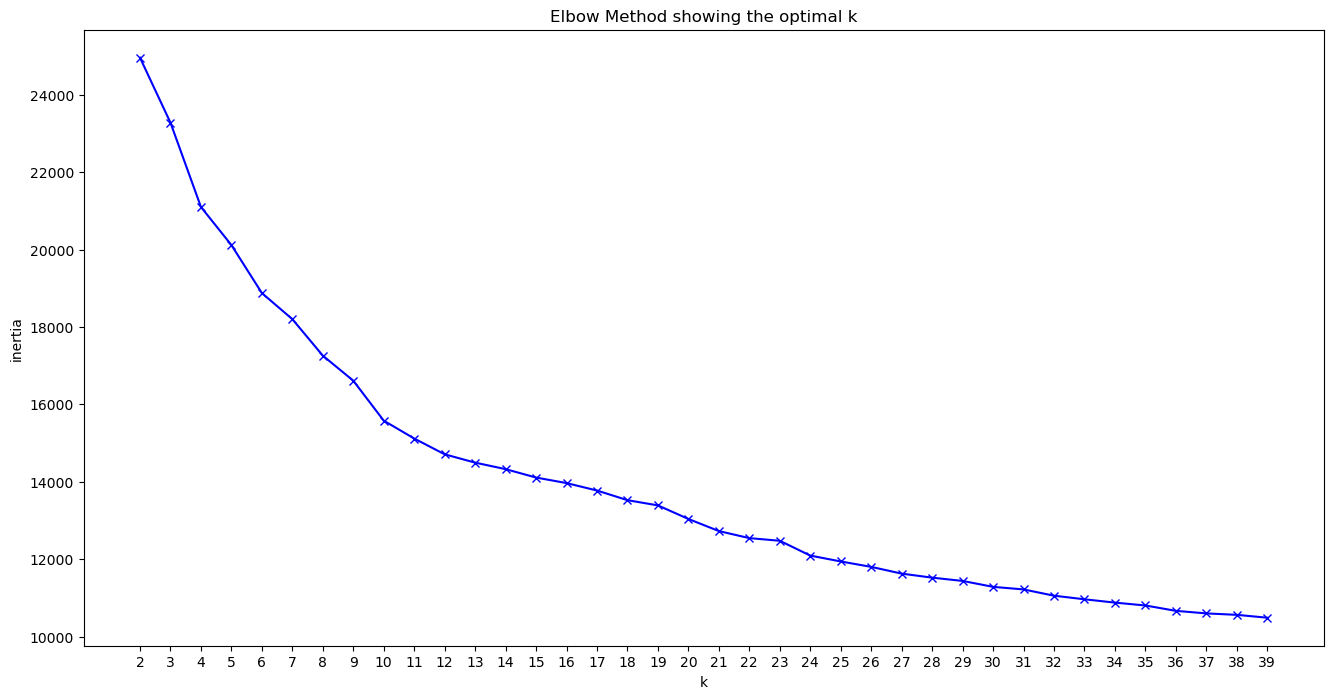

In [137]:
K = range(2, 40)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

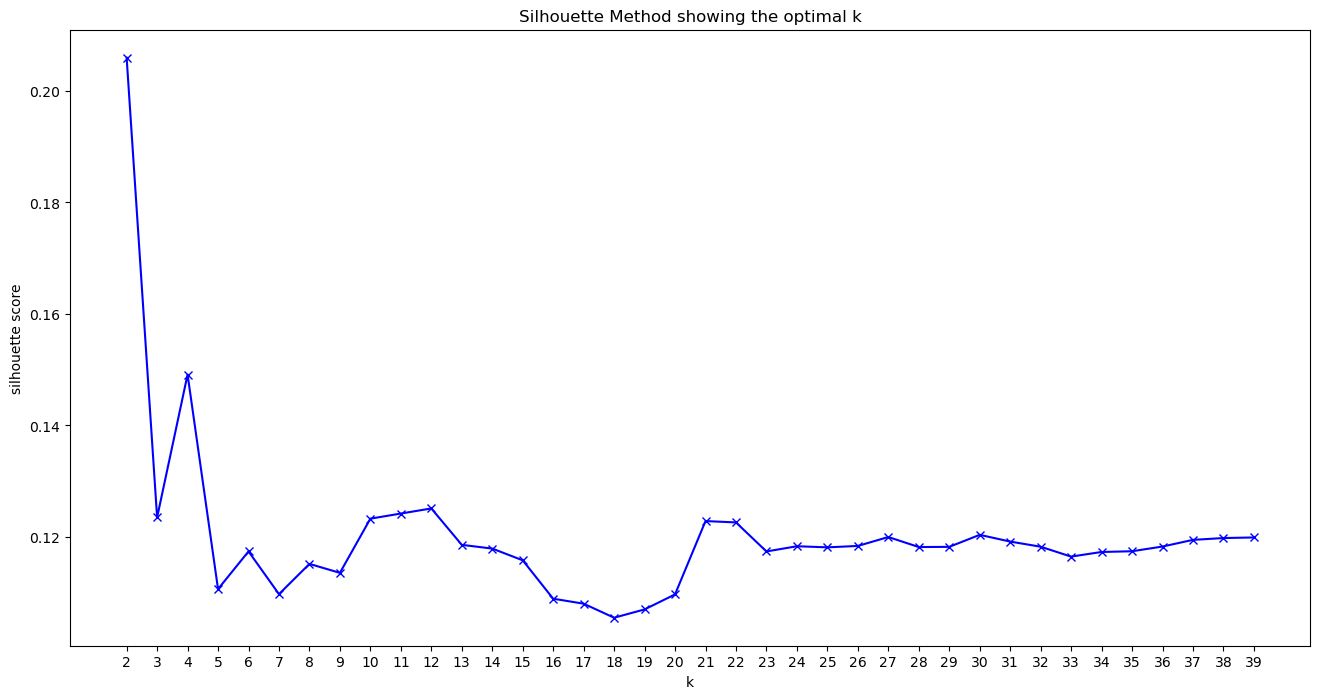

In [160]:
K = range(2, 40)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234, n_init='auto')
    kmeans.fit(X_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle"
    #with open(filename, "wb") as f:
        #pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [136]:
def save (model, filename_dot_pickle):
    with open(filename, "wb") as f:
    	pickle.dump(model, f)

def load(filename_dot_pickle):
	try:
	    with open(filename, "rb") as f:
	        return pickle.load(f)
	except FileNotFoundError:
             print('File not found!')

save(name-of-model, "model.pickle") to save it


load("model.pickle")  to load it into a notebook

## Saving the pickle

In [161]:

def save(model, filename = 'filename.pickle'):
    with open(filename, "wb") as f:
        pickle.dump(model, f)


def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!")

In [162]:
save(kmeans, "kmeans21.pickle")

In [163]:
load("kmeans21.pickle")

KMeans(n_clusters=39, random_state=1234)

In [ ]:
#Research about n init
#K mean plus plus